# Predicting who has survived the Titanic disaster with Supervised Learning Algorithm

We use the famous Titanic Dataset from Kaggle and try to predict the most accurately who survived to the Titanic.

We follow the steps below:

1. Load the file titanic/train.csv. 

2. Visualise and analyse the data. 

3. The aim is to predict the survived column.

4. Handle categorical and other data.

5. Look for missing data and other issues.

6. Visualise the data and look for outliers to remove.

7. Split the data into a 33% test and 66% training set.

8. Use a logistic regression, KNN, decision tree and SVM model to see which performs best

9. By removing one feature at a time and seeing its effect, find the most important features.

10. Results discussion

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [167]:
df = pd.read_csv("titanic/train.csv")

In [168]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


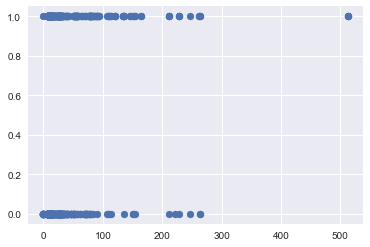

In [170]:
plt.scatter(df.Fare, df.Survived)

In [171]:
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex', 'Ticket', 'Cabin', 'Embarked']]
#Split categorical and numerical Data

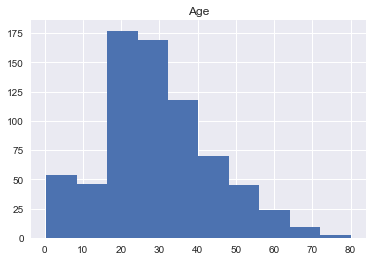

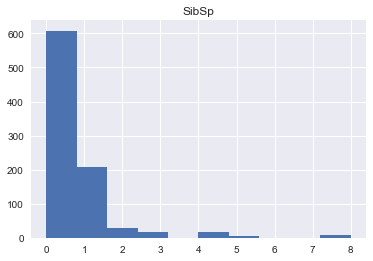

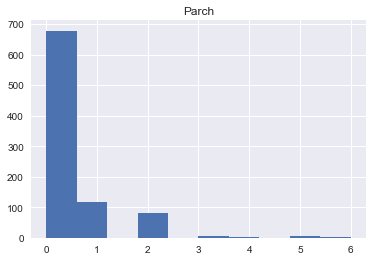

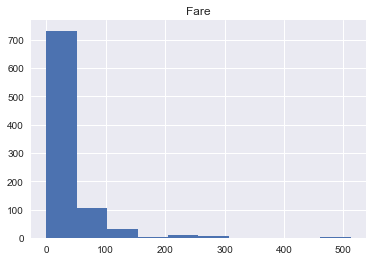

In [172]:
 for i in df_num.columns:
        plt.hist(df_num[i])
        plt.title(i)
        plt.show()

          Survived       Age      Fare
Survived  1.000000 -0.077221  0.257307
Age      -0.077221  1.000000  0.096067
Fare      0.257307  0.096067  1.000000


<AxesSubplot:>

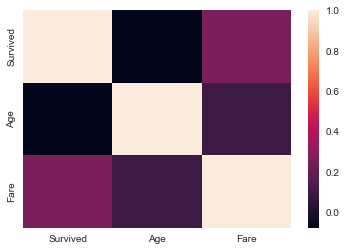

In [173]:
print(df[['Survived', 'Age', 'Fare']].corr())
sns.heatmap(df[['Survived', 'Age', 'Fare']].corr())
# 25% positive correl between Fare and Survival chance

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

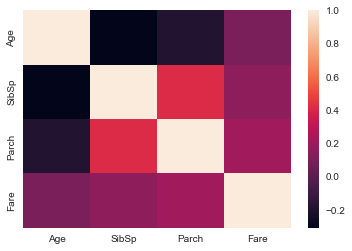

In [174]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [175]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


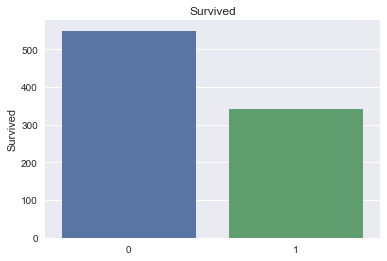

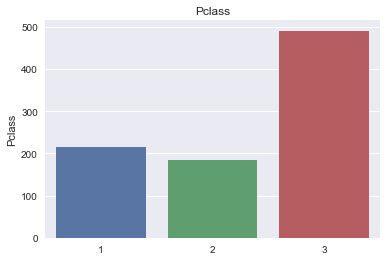

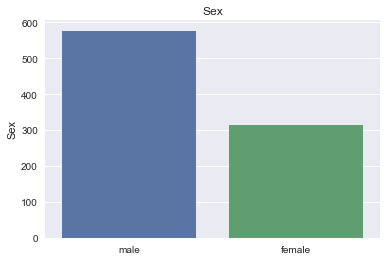

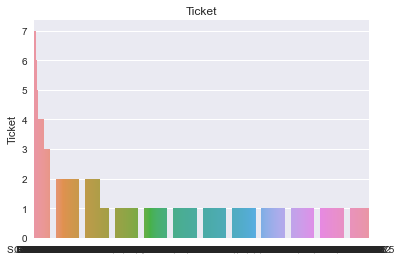

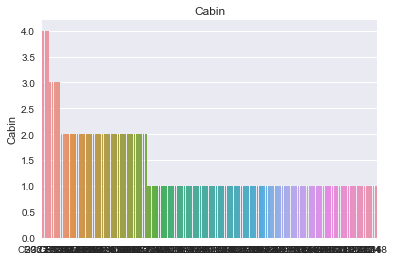

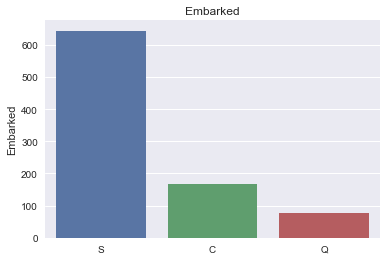

In [176]:
for i in df_cat.columns:
        sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
        plt.show()

In [177]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


<AxesSubplot:title={'center':'Percentage of Survived by Embarcation Place'}>

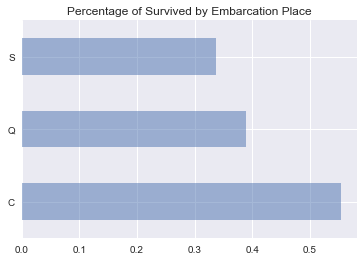

In [178]:
df_survived = df[df.Survived==1]
plt.title("Percentage of Survived by Embarcation Place")
numer = df_survived.Embarked.value_counts().sort_index()
denom = df.Embarked.value_counts().sort_index()
(numer/denom).plot(kind='barh', alpha=0.5)

In [179]:
#Embarcation Place looks signifcant! But less than hundred people embarked at Q

# Feature Engineering

In [180]:
df_cat.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [181]:
df_cat.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)

In [182]:
df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [183]:
pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1
Survived,,
0,481,68
1,206,136


In [184]:
# more chance to survive when they have a cabin number?

In [185]:
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])

In [186]:
print(df.cabin_adv.value_counts())
pd.pivot_table(df, index = 'Survived', columns = 'cabin_adv', values = 'Ticket', aggfunc = 'count')

#more chance to survive in function of the cabin category / location?

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [187]:
 # Cabin letters seems to have a significance (maybe due to cabin location)

In [188]:
df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64

In [189]:
df.Age = df.Age.fillna(df.Age.median())
df.Fare = df.Fare.fillna(df.Fare.median())
df.dropna(subset=['Embarked'],inplace = True)

<AxesSubplot:>

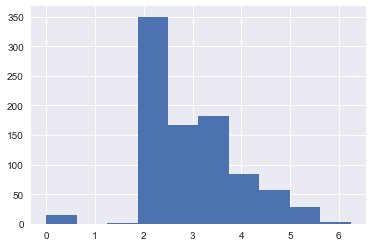

In [190]:
df['norm_fare'] = np.log(df.Fare+1)
df['norm_fare'].hist()

In [191]:
all_dummies = pd.get_dummies(df[['Survived', 'Sex','Age', 'name_title', 'norm_fare', 'SibSp','Parch', 'Embarked','cabin_multiple']])

# 'Survived','Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_multiple','name_title'
#cabin_adv', 'name_title'

In [192]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','norm_fare', 'SibSp','Parch']]= scale.fit_transform(all_dummies_scaled[['Age', 'norm_fare', 'SibSp','Parch']])
all_dummies_scaled

,Survived,Age,norm_fare,SibSp,Parch,cabin_multiple,Sex_female,Sex_male,name_title_Capt,name_title_Col,...,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0,-0.563674,-0.877591,0.431350,-0.474326,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0.669217,1.366380,0.431350,-0.474326,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,-0.255451,-0.796281,-0.475199,-0.474326,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.438050,1.066796,0.431350,-0.474326,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0.438050,-0.781901,-0.475199,-0.474326,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.178396,-0.330815,-0.475199,-0.474326,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
887,1,-0.794841,0.491068,-0.475199,-0.474326,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,-0.101340,0.245663,0.431350,2.006119,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,-0.255451,0.491068,-0.475199,-0.474326,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [193]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [194]:
X = all_dummies_scaled.drop('Survived', axis = 'columns')
y = all_dummies_scaled['Survived']

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 12)

In [196]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [197]:
y_predX = LogReg.predict(X)

In [198]:
LogReg.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [199]:
LogReg.score(X_train, y_train)

0.8168067226890756

In [200]:
y_pred = LogReg.predict(X_test)

In [201]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[155  31]
 [ 17  91]]


In [202]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_predX)
print(cm)

[[471  78]
 [ 79 261]]


In [203]:
# 160 True Neg / 20 False Positive
# 20 False Neg / 94 True Positive

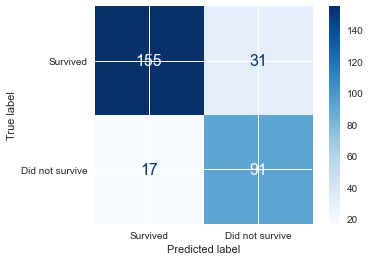

In [204]:
import HelpfulFunctions as hp
hp.plot_cm(LogReg, X_test, y_test, labels=['Survived','Did not survive'])

In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       186
           1       0.75      0.84      0.79       108

    accuracy                           0.84       294
   macro avg       0.82      0.84      0.83       294
weighted avg       0.84      0.84      0.84       294



### K Nearest Neighbours

In [206]:
from sklearn.neighbors import KNeighborsClassifier

In [207]:
K = 10

In [208]:
KNC = KNeighborsClassifier(K)

In [209]:
KNC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [210]:
KNC.score(X_train, y_train)

0.8369747899159664

In [211]:
y_predKNC = KNC.predict(X_test)

In [212]:
confusion_matrix(y_test, y_predKNC)

array([[161,  25],
       [ 27,  81]], dtype=int64)

### SVM

In [213]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')
SVC.fit(X_train, y_train)

SVC(kernel='linear')

In [214]:
SVC.score(X_train,y_train)

0.8218487394957983

In [215]:
y_predSVC = KNC.predict(X_test)

In [216]:
confusion_matrix(y_test, y_predSVC)

array([[161,  25],
       [ 27,  81]], dtype=int64)

### Decision Tree

In [217]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(max_depth = 3, random_state = 234)
DTR.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=234)

In [218]:
y_predDTR = DTR.predict(X_test)

In [219]:
confusion_matrix(y_test, y_predDTR)

array([[155,  31],
       [ 26,  82]], dtype=int64)

In [220]:
DTR.score(X_train, y_train)

0.8016806722689076